In [1]:
import pandas as pd

df = pd.read_feather('datasets/empresas.feather')
df


,empresa,retorno,disclosure,endividamento,ativos,liquidez
0,Adidas,63.67,83.0,1.3,3967.0,14.3
1,BASF,55.49,91.0,33.9,5450.0,16.8
2,Bayer,52.42,77.0,36.1,4327.0,15.5
3,BSH,54.00,90.0,20.8,4109.0,16.8
4,Bosch,68.01,93.0,14.1,4458.0,17.0
...,...,...,...,...,...,...
119,DuPont,39.85,41.0,49.5,2996.0,10.5
120,ExxonMobil,44.16,35.0,16.8,3622.0,12.3
121,FedEx,45.38,24.0,16.1,2972.0,9.7
122,Ford Motors,45.25,68.0,34.8,4691.0,8.9


In [2]:
df.describe()

,retorno,disclosure,endividamento,ativos,liquidez
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,46.195484,49.677419,27.734677,3739.064516,12.300000
std,15.075886,31.338059,12.454287,1538.500462,3.141746
min,21.030000,6.000000,1.200000,1851.000000,7.900000
25%,33.840000,18.000000,18.525000,2597.000000,9.300000
50%,44.175000,41.000000,24.950000,3476.000000,12.200000
75%,58.205000,83.000000,34.125000,4458.000000,15.800000
max,86.180000,98.000000,64.900000,9010.000000,17.000000


In [3]:
# correlação

df_corr = df.corr(method='pearson')
print(df_corr, "\n")

                retorno  disclosure  endividamento    ativos  liquidez
retorno        1.000000    0.863747       0.004577  0.811349  0.859083
disclosure     0.863747    1.000000       0.136587  0.831343  0.867605
endividamento  0.004577    0.136587       1.000000  0.228085 -0.081803
ativos         0.811349    0.831343       0.228085  1.000000  0.702286
liquidez       0.859083    0.867605      -0.081803  0.702286  1.000000 



C:\Users\josen\AppData\Local\Temp\ipykernel_24448\840412084.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method='pearson')


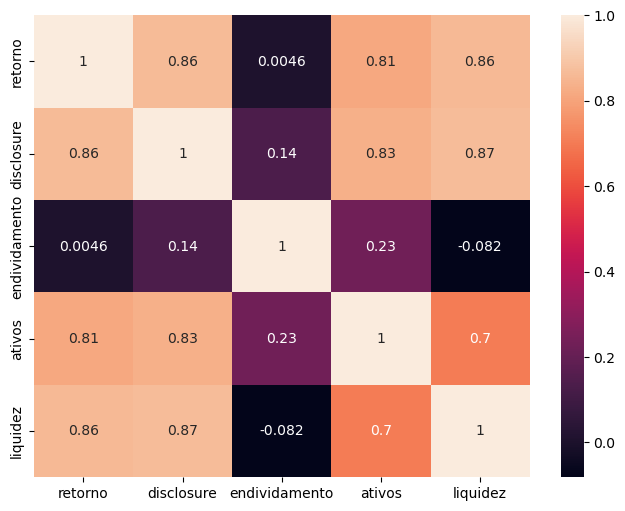

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sb.heatmap(df_corr, annot=True)
plt.show()


In [5]:
import statsmodels.api as sm

# defining the variables
X = df.drop(columns=['empresa','retorno'])
y = df['retorno']

In [6]:
# adding the constant term
X = sm.add_constant(X)

# performing the regression
# and fitting the model
model = sm.OLS(y, X).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                retorno   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     147.9
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           3.35e-45
Time:                        13:41:26   Log-Likelihood:                -401.07
No. Observations:                 124   AIC:                             812.1
Df Residuals:                     119   BIC:                             826.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.0506      4.080      1.483

In [7]:
# feature selection

from sklearn.feature_selection import RFE #recursive elimination
from sklearn.linear_model import LinearRegression

model_rfe = RFE(estimator=LinearRegression(), n_features_to_select=4, step=1)

In [8]:
model_rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [9]:
model_rfe.ranking_

array([2, 1, 1, 1, 1])

In [10]:
model_rfe.support_

array([False,  True,  True,  True,  True])

In [11]:
model_rfe.transform(X)

array([[8.300e+01, 1.300e+00, 3.967e+03, 1.430e+01],
       [9.100e+01, 3.390e+01, 5.450e+03, 1.680e+01],
       [7.700e+01, 3.610e+01, 4.327e+03, 1.550e+01],
       [9.000e+01, 2.080e+01, 4.109e+03, 1.680e+01],
       [9.300e+01, 1.410e+01, 4.458e+03, 1.700e+01],
       [9.000e+01, 4.520e+01, 6.498e+03, 1.580e+01],
       [8.900e+01, 3.160e+01, 4.993e+03, 1.600e+01],
       [9.000e+01, 2.490e+01, 6.352e+03, 1.650e+01],
       [9.800e+01, 3.150e+01, 9.010e+03, 1.700e+01],
       [5.800e+01, 1.520e+01, 3.189e+03, 1.580e+01],
       [7.400e+01, 1.710e+01, 3.476e+03, 1.600e+01],
       [8.100e+01, 6.490e+01, 4.700e+03, 1.220e+01],
       [4.600e+01, 4.730e+01, 3.785e+03, 1.100e+01],
       [3.900e+01, 2.230e+01, 2.901e+03, 1.260e+01],
       [4.000e+01, 3.340e+01, 3.872e+03, 1.260e+01],
       [1.700e+01, 2.360e+01, 2.597e+03, 1.220e+01],
       [5.400e+01, 2.400e+00, 3.477e+03, 1.120e+01],
       [2.700e+01, 2.500e+01, 2.730e+03, 9.300e+00],
       [3.000e+01, 2.830e+01, 3.390e+03, 9.200

In [12]:
# defining the variables
X_reduced = df.drop(columns=['empresa','retorno','endividamento'])

In [13]:
# adding the constant term
X_reduced = sm.add_constant(X_reduced)

# performing the regression
# and fitting the model
model_reduced = sm.OLS(y, X_reduced).fit()

# printing the summary table
print(model_reduced.summary())



                            OLS Regression Results                            
Dep. Variable:                retorno   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           9.55e-46
Time:                        13:43:48   Log-Likelihood:                -402.60
No. Observations:                 124   AIC:                             813.2
Df Residuals:                     120   BIC:                             824.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0461      3.380      0.605      0.5

In [14]:
yhat = model_reduced.predict(X_reduced)

18.49659905081425
9.627522652149492e-05


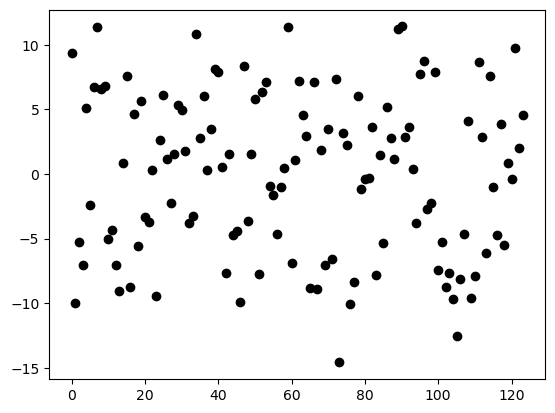

In [15]:
residuals = y - yhat

plt.plot(residuals,'ko')

from scipy import stats
res = stats.normaltest(residuals)
print(res.statistic)
print(res.pvalue)



#### houve rejeição da hipótese nula de que os resíduos são aderentes à normalidade. Vamos usar transformação BOX-COX

In [16]:
from scipy import stats

yt, lamb = stats.boxcox(y)

In [17]:
lamb

-0.022564100754067663

In [18]:
# performing the regression
# and fitting the model
X_reduced = sm.add_constant(X_reduced)
model_bc = sm.OLS(yt, X_reduced).fit()

# printing the summary table
print(model_bc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.21e-41
Time:                        13:44:32   Log-Likelihood:                 73.887
No. Observations:                 124   AIC:                            -139.8
Df Residuals:                     120   BIC:                            -128.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8275      0.072     39.019      0.0

In [19]:
yhatbc = model_bc.predict(X_reduced)

2.713804392031617
0.2574570945120266


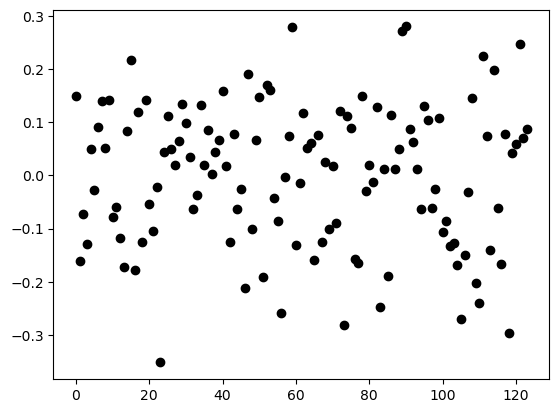

In [20]:
residuals = yt - yhatbc

plt.plot(residuals,'ko')

from scipy import stats
res = stats.normaltest(residuals)
print(res.statistic)
print(res.pvalue)

In [21]:
df['retorno_fitted_bc'] = yt
df

,empresa,retorno,disclosure,endividamento,ativos,liquidez,retorno_fitted_bc
0,Adidas,63.67,83.0,1.3,3967.0,14.3,3.965002
1,BASF,55.49,91.0,33.9,5450.0,16.8,3.839599
2,Bayer,52.42,77.0,36.1,4327.0,15.5,3.787582
3,BSH,54.00,90.0,20.8,4109.0,16.8,3.814731
4,Bosch,68.01,93.0,14.1,4458.0,17.0,4.024999
...,...,...,...,...,...,...,...
119,DuPont,39.85,41.0,49.5,2996.0,10.5,3.536070
120,ExxonMobil,44.16,35.0,16.8,3622.0,12.3,3.630464
121,FedEx,45.38,24.0,16.1,2972.0,9.7,3.655476
122,Ford Motors,45.25,68.0,34.8,4691.0,8.9,3.652844


In [23]:
import numpy as np
X_test = np.array([1, 75.0, 4000, 14.0]) #liquidez 14 e ativo 4000 - o do const deixa 1 para multiplicar por beta_0
y_test = model_bc.predict(X_test)

y_test

array([3.78028032])

In [24]:
model_bc.params[0]

2.8275355102140836

In [25]:
#Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted value de Y (retorno)
df['retorno_adj'] = (((df['retorno_fitted_bc'] * lamb) + 1.)) ** (1 / lamb)

In [27]:
df

,empresa,retorno,disclosure,endividamento,ativos,liquidez,retorno_fitted_bc,retorno_adj
0,Adidas,63.67,83.0,1.3,3967.0,14.3,3.965002,63.67
1,BASF,55.49,91.0,33.9,5450.0,16.8,3.839599,55.49
2,Bayer,52.42,77.0,36.1,4327.0,15.5,3.787582,52.42
3,BSH,54.00,90.0,20.8,4109.0,16.8,3.814731,54.00
4,Bosch,68.01,93.0,14.1,4458.0,17.0,4.024999,68.01
...,...,...,...,...,...,...,...,...
119,DuPont,39.85,41.0,49.5,2996.0,10.5,3.536070,39.85
120,ExxonMobil,44.16,35.0,16.8,3622.0,12.3,3.630464,44.16
121,FedEx,45.38,24.0,16.1,2972.0,9.7,3.655476,45.38
122,Ford Motors,45.25,68.0,34.8,4691.0,8.9,3.652844,45.25


In [26]:
y_true = (((3.73801942 * lamb) + 1.)) ** (1 / lamb)
y_true

49.656374536256045

#### Para saber mais: https://medium.com/@vineet.pandya/test-of-normality-box-cox-transformation-in-details-c4bdfc2c352a